# COMPUTING ASSIGNMENT 3 SUBMISSION

ANANYA CHINMAYA - 210070008

#                                             COMPUTING ASSIGNMENT - 3

In this assignment, we aim to explore the concept of Convolutional Neural Networks (CNNs) and their suitability for image classification tasks. We will understand the significance of automatic feature learning in image classification and how CNNs excel in utilizing spatial relationships within images.
To Do:
    a. You will have to to successfully run this notebook and understand the steps.
    b. Make any modifications/additions to demonstrate that the model trained correctly, by using an image from the 'Test' dataset and verify that it was correctly classified.
    c. Take an image of a your own handwritten digit (possibly in a 5cm x 5cm sheet) and verify if the model is able to classify it correctly. If it fails, justify the reason.
    d. Take images of a specific digit, one from the 'train' and 'test' set. Extract the SIFT features for these digits. Compare them using their SIFT features and verify if they match. Justify.
    e. Create a copy of this notebook and now use the CIFAR10 dataset and modify the template (keep the basic model same as 'Sequential', but can make other changes) as necessary to perform classification on this dataset. Show that the trained model is able to classify the objects from the given 'Train' set. Does it work for your own image (not necessarily in the dataset) ?

### A basic CNN architecture

CNNs are a class of deep learning models designed to automatically and adaptively learn spatial hierarchies of features from input data, particularly images. They are characterized by their ability to learn directly from pixel data with minimal preprocessing. A CNN employs spatial convolution for processing. This operation calculates a sum of products between pixel values and a set of kernel weights, applied at each spatial location in the input image. The result at each location is a scalar value, analogous to the output of a neuron in a fully connected neural network. Adding a bias and applying an activation function completes the analogy with fully connected networks.

![cnn.png](attachment:cnn.png)

A typical CNN architecture consists of several layers:

Convolutional Layer: These layers apply convolution operations to the input data, which involves sliding a small filter (kernel) over the input to detect patterns and features.

Pooling Layer: Pooling layers reduce the spatial dimensions of the input by taking the maximum or average value within a small window. This helps reduce the computational load and focuses on the most important features.

Fully Connected Layer (Dense Layer): These layers are traditional neural network layers that take the output of the previous layers and produce the final classification or regression output.

### Visualizing feature maps after convolution and pooling operations

We will try to visualize the features in each layer of a CNN using the MNIST dataset

In [ ]:
#make sure libraries like TensorFlow, Keras, NumPy, and Matplotlib are installed
#if not, uncomment the following line
#pip install tensorflow keras numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

Next, we load the MNIST dataset and view a few samples from it

11490434/11490434 [==============================] - 0s 0us/step


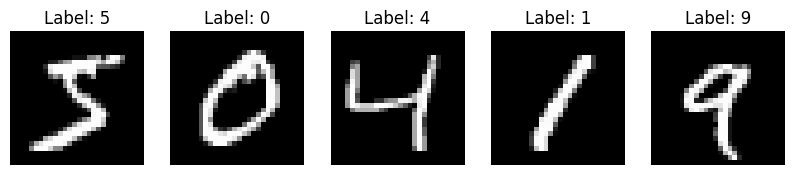

In [ ]:
#Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


#Display a few sample images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28, 1)

Now, let us visualize how convolution and pooling operations affect the sizes and structure of feature maps. We load an image, create a 5x5 receptive field (convolution kernel), and perform convolution on the image. After convolution, we apply max-pooling with a 2x2 neighborhood to obtain the pooled feature map

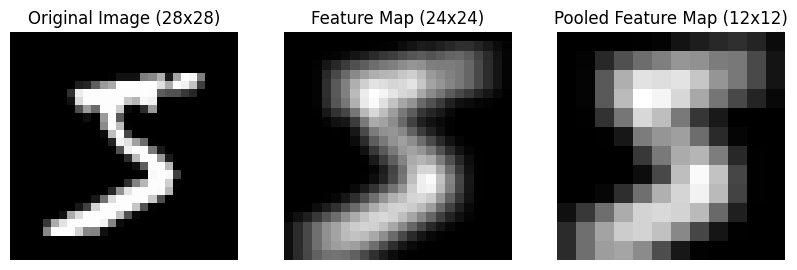

In [ ]:
image = x_train[0]

#Create a random 5x5 receptive field
receptive_field = np.random.rand(5, 5)

feature_map = np.zeros((24, 24))  # Output feature map size after convolution (28-5+1)x(28-5+1)

for i in range(24):
    for j in range(24):
        feature_map[i, j] = np.sum(image[i:i+5, j:j+5] * receptive_field) #Perform convolution

#Perform max-pooling with a 2x2 neighborhood
pooled_feature_map = np.zeros((12, 12))

for i in range(0, 24, 2):
    for j in range(0, 24, 2):
        pooled_feature_map[i//2, j//2] = np.max(feature_map[i:i+2, j:j+2])

#Visualize the image, feature map, and pooled feature map
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Original Image (28x28)")
plt.axis('off')

plt.subplot(132)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (24x24)")
plt.axis('off')

plt.subplot(133)
plt.imshow(pooled_feature_map, cmap='gray')
plt.title("Pooled Feature Map (12x12)")
plt.axis('off')

plt.show()


Let us visualize how an input image propagates through the CNN and visualize the feature maps at different layers of the network. To do so, we create a simple CNN model with 2 convolutional layers and pooling.

1/1 [==============================] - 0s 62ms/step


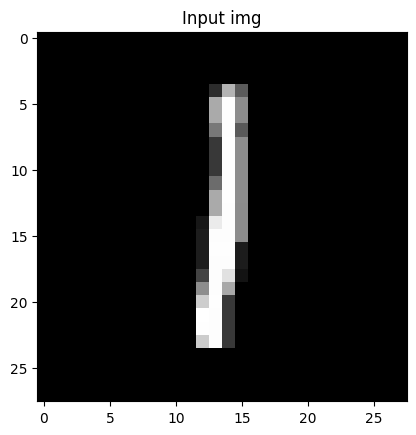

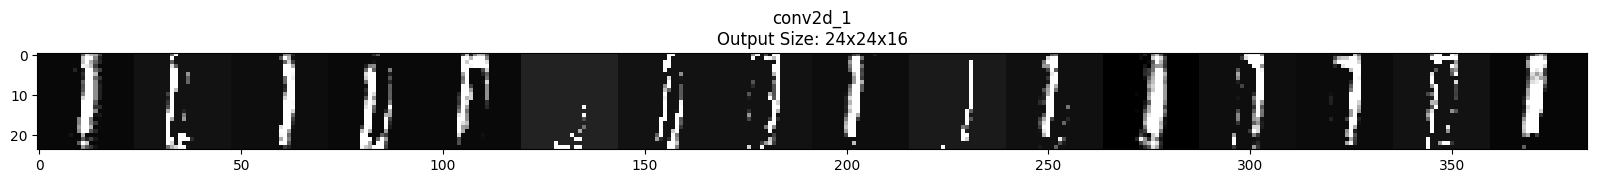

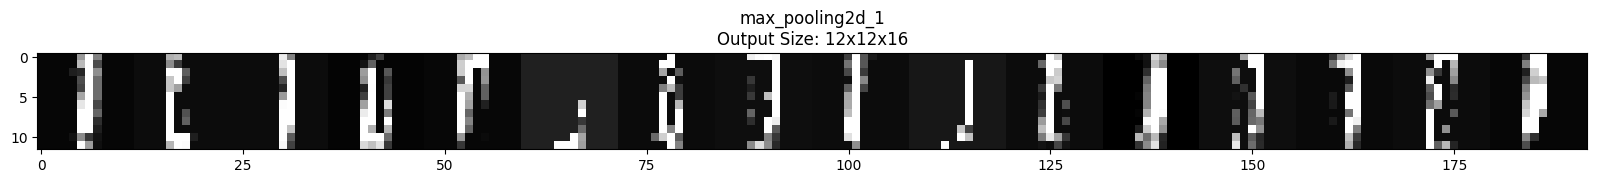

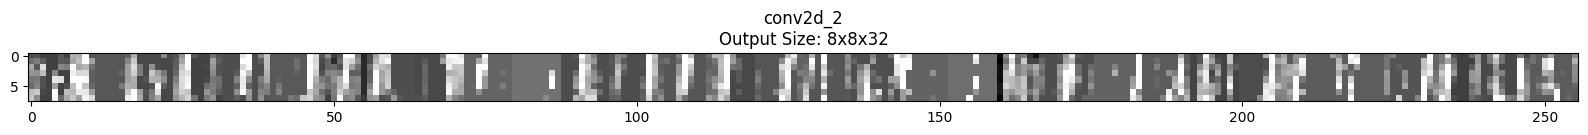

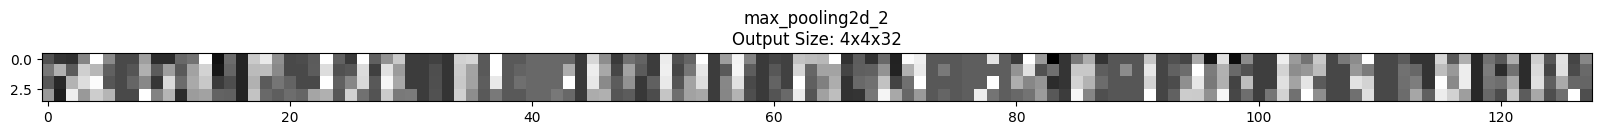

In [ ]:
import tensorflow as tf
#Select a random MNIST image from the training set
random_index = np.random.randint(0, len(x_train))
img = x_train[random_index]
plt.title('Input img')
plt.imshow(img,cmap='gray')

#Create a simple CNN model with two convolutional layers and pooling
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1))) #16 kernels, 5x5 each
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))                          #32 kernels, 5x5 each
model.add(MaxPooling2D((2, 2)))

####MODIFICATION: ADDING ANOTHER CONV2D LAYER #################
model.add(Conv2D(64, (3, 3), activation='relu'))  #64 kernels, 3x3 each
model.add(MaxPooling2D((2, 2)))
#####END OF MODIFICATION #########################



img = img.reshape((28, 28, 1))  # Add the channel dimension
img = img / 255.0  # Normalize the pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add the batch dimension

#Create a model to visualize feature maps
layer_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# Get the feature maps for the example image
feature_maps = visualization_model.predict(img)

# Visualize the feature maps
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']

# Iterate through each layer and its corresponding feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    # Get the number of feature maps in the current layer
    n_features = feature_map.shape[-1]

    # Get the size of each feature map (assuming they are square)
    size = feature_map.shape[1]

    # Create an empty grid to display all feature maps in this layer
    display_grid = np.zeros((size, size * n_features))



    # Iterate through each feature map in the current layer
    for i in range(n_features):
        # Extract the current feature map
        x = feature_map[0, :, :, i]

        # Normalize the values for better visualization
        x -= x.mean()  # Subtract the mean value to center around 0
        x /= x.std()  # Divide by standard deviation for scaling
        x *= 64  # Scale values for better visibility
        x += 128  # Shift values to be within the [0, 255] range
        x = np.clip(x, 0, 255).astype('uint8')  # Clip values to the [0, 255] range

        # Add the current feature map to the display grid
        display_grid[:, i * size: (i + 1) * size] = x

    # Set the scale for displaying the grid
    scale = 20. / n_features

    # Create a new figure to display the feature maps for this layer
    plt.figure(figsize=(scale * n_features, scale))

    # Set the title for this layer, along with input and output size
    plt.title(f'{layer_name}\nOutput Size: {size}x{size}x{n_features}')

    # Remove grid lines for a cleaner visualization
    plt.grid(False)

    # Display the feature maps in the current layer using the viridis colormap
    plt.imshow(display_grid, aspect='auto', cmap='gray')

# Show all the visualizations
plt.show()




### Training a CNN

We add fully connected dense layers to the above model after flattening the feature maps. These dense layers will learn to classify the digit images after the convolutional and pooling layers extract features.

We one-hot encode the labels, preparing them for categorical cross-entropy loss during training. Next, the model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.

The model is trained on the training set for 5 epochs with a batch size of 128.

We plot the training history, including training and validation loss, and training and validation accuracy, to visualize how these metrics change over time.

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.3160 - accuracy: 0.9059 - val_loss: 0.0805 - val_accuracy: 0.9755
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0810 - accuracy: 0.9760 - val_loss: 0.0552 - val_accuracy: 0.9824
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0610 - val_accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.0333 - val_accuracy: 0.9903
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0331 - val_accuracy: 0.9907


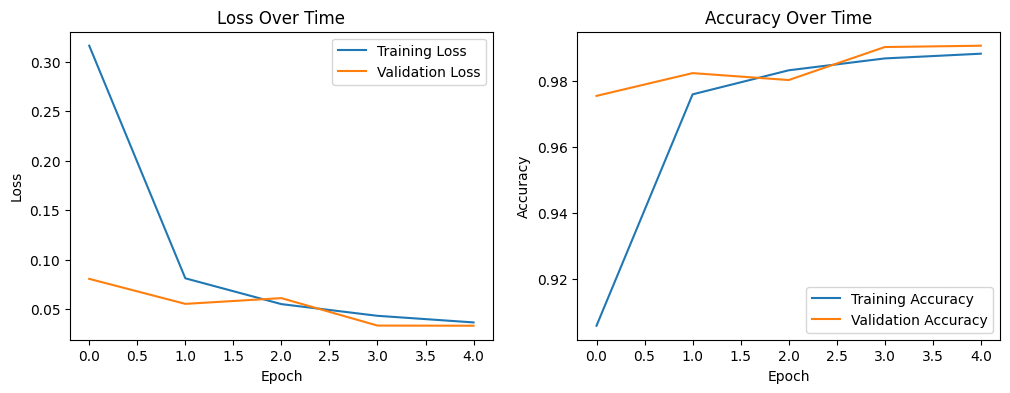

313/313 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.9907
Test Loss: 0.0331
Test Accuracy: 99.07%


313/313 [==============================] - 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
 [[ 975    0    1    0    0    0    2    2    0    0]
 [   0 1122    2    2    0    2    1    6    0    0]
 [   0    0 1024    0    1    0    0 

In [ ]:
#Flatten the feature maps and add fully connected dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

#encode the labels(one-hot)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

#Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.show()

#Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

#Generate predictions
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

#Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))

The performance analysis on each digit class for both the training and test sets reveals a crucial aspect: the CNN achieved similar accuracy on both datasets. This indicates a successful training process and robust generalization to unseen digits. The network's ability to perform well on the test set demonstrates that it didn't overfit the training data.

We can also view the learnt kernels after the model has been trained. These are shown for the first layer below.

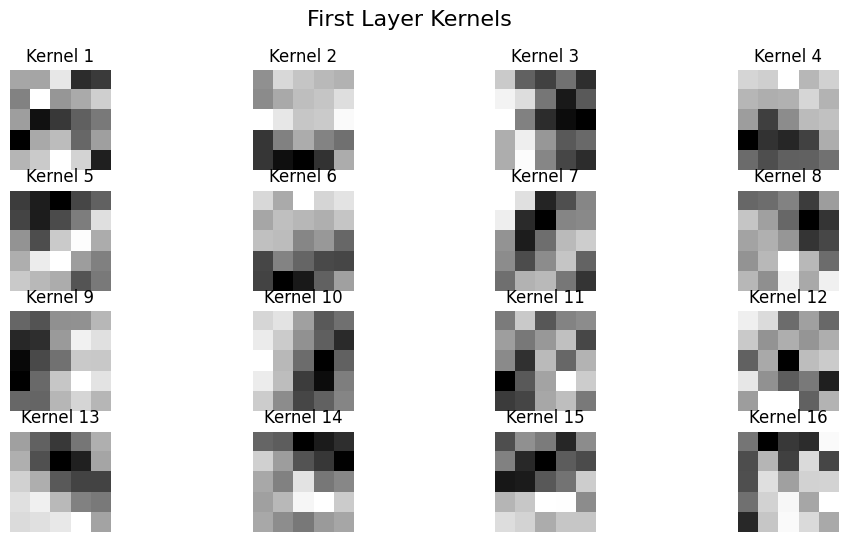

In [ ]:
first_layer_weights = model.layers[0].get_weights()[0]

#Visualize the weights
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_layer_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Kernel {i + 1}')

plt.suptitle('First Layer Kernels', fontsize=16)
plt.show()

Let us visualize a test image as it propagates through the trained model.

1/1 [==============================] - 0s 130ms/step


<ipython-input-26-7fb1881253c6>:32: RuntimeWarning: invalid value encountered in divide
  feature_map_i /= feature_map_i.std()  # Divide by standard deviation for scaling


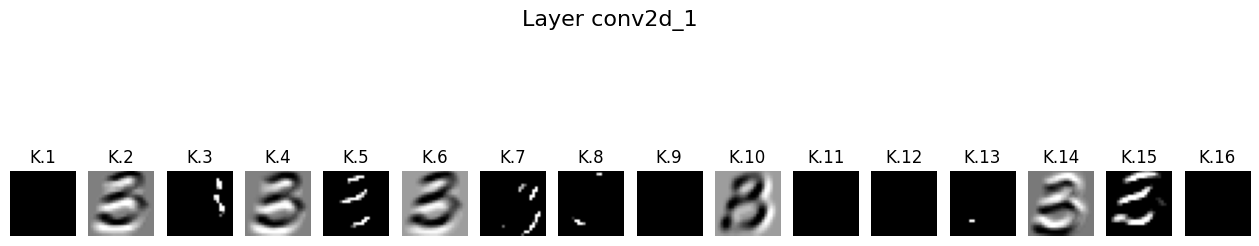

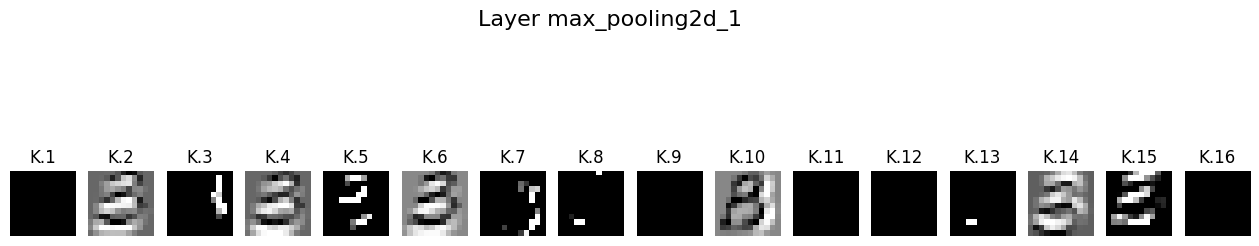

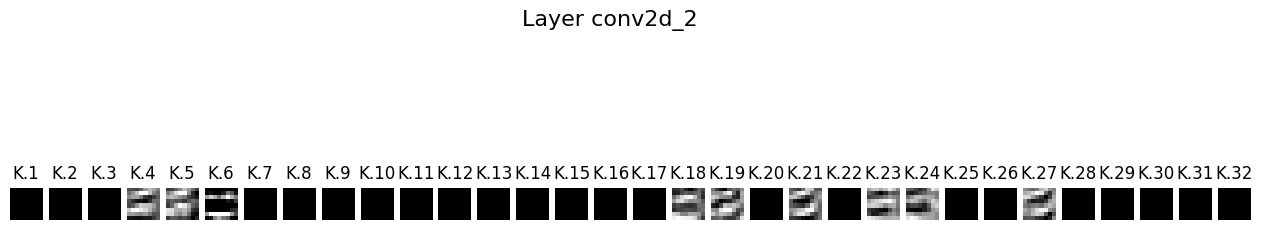

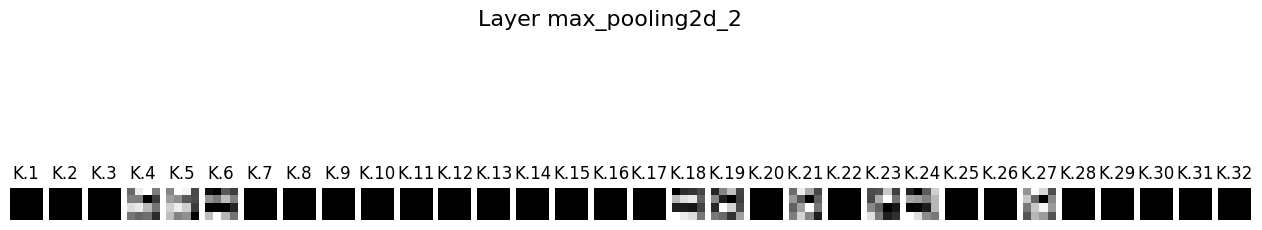

In [ ]:
#Select a random MNIST image from the test set
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]

#Preprocess the test image for visualization
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

#Extract the parameters from the trained model and create a visualization model with these
layer_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

#Get the feature maps for the test image
feature_maps = visualization_model.predict(test_image)

#Visualize the feature maps at different layers
layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']

for layer_name, feature_map in zip(layer_names, feature_maps):
    # Get the number of feature maps in the current layer
    n_features = feature_map.shape[-1]

    # Create a new figure to display the feature maps for this layer
    plt.figure(figsize=(16, 4))

    # Visualize feature maps for each kernel in the current layer
    for i in range(n_features):
        feature_map_i = feature_map[0, :, :, i]

        # Normalize the values for better visualization
        feature_map_i -= feature_map_i.mean()  # Subtract the mean value to center around 0
        feature_map_i /= feature_map_i.std()  # Divide by standard deviation for scaling
        feature_map_i *= 64  # Scale values for better visibility
        feature_map_i += 128  # Shift values to be within the [0, 255] range
        feature_map_i = np.clip(feature_map_i, 0, 255).astype('uint8')  # Clip values to the [0, 255] range

        # Create subplots for each feature map
        plt.subplot(1, n_features, i + 1)
        plt.imshow(feature_map_i, cmap='gray')
        plt.axis('off')
        plt.title(f'K.{i + 1}')

    plt.suptitle(f'Layer {layer_name}', fontsize=16)
    plt.show()



#Part A
The layers have the following functions:
### Conv2D Layers:
There are two such layers. One with 16 kernels and another with 32. The kernels are the number of filters applied at that layer.
The first convolutional layer applies 16 filters of size 5x5 to the input images. These filters are designed to detect various patterns and features in the input images, such as edges, corners, or more complex structures. The ReLU activation function introduces non-linearity to the model.
Similarly, the second CNN layer applies 32 filters of size 5x5.
### Max Pooling Layers:
Max pooling is a downsampling operation that reduces the spatial dimensions of the representation and retains the most important information. In this case, it reduces the size of the feature maps by taking the maximum value within each 2x2 region.
### Flatten Layer:
Flattens the 3D output to a 1D vector. This is necessary before passing the data to fully connected layers.

### Dense Layers:
Also known as Fully Connected Layers. The first fully connected layer with 64 neurons captures high-level features from the flattened input. The ReLU activation function introduces non-linearity.
The final fully connected layer with 10 neurons (one for each digit) produces the output probabilities for each class. The Softmax activation function converts these scores into probability distributions, and the predicted class is the one with the highest probability.


##MODIFICATION:
To demonstrate the working of the model, we added another Conv2D Layer of 64 kernels of size 5x5, after the two conv2d layers and before the dense layers, and we followed it up with another Max Pool Layer.
The accuracy on the training dataset reduced from 99.07% to 98.70%

#Part B
As demonstrated below, the predicted label for the test data is same as the actual label.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9907000064849854


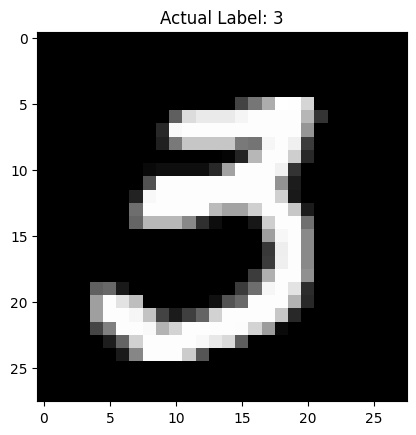

1/1 [==============================] - 0s 18ms/step
Actual Label: 3
Predicted Label: 3


In [ ]:
# Select a random image from x_train for demonstration
random_index = np.random.randint(0, len(x_test))
input_image = x_test[random_index]
actual_label = y_test[random_index]

# Display the input image
plt.imshow(input_image.squeeze(), cmap='gray')
plt.title(f"Actual Label: {np.argmax(actual_label)}")
plt.show()

# Reshape the input image to match the model's input shape
input_image = np.expand_dims(input_image, axis=0)

# Predict the label using the pre-trained model
predicted_label = np.argmax(model.predict(input_image))

# Display the actual and predicted labels
print(f"Actual Label: {np.argmax(actual_label)}")
print(f"Predicted Label: {predicted_label}")

#Part C

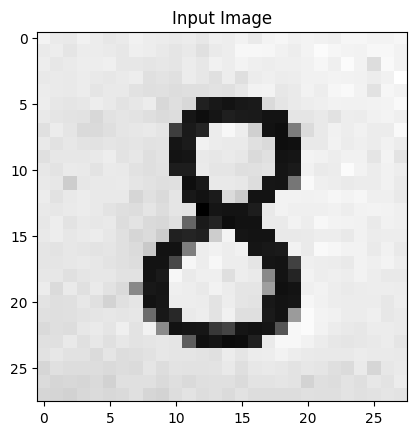

1/1 [==============================] - 0s 39ms/step
Predicted Label: 8
Actual Label: 8


In [ ]:
from tensorflow.keras.preprocessing import image
# loading handwritten digit
image_path = 'eight_handwritten.jpeg'

# preprocess the image
img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array /= 255.0
img_array = np.expand_dims(img_array, axis=0)

# Display the input image
plt.imshow(img_array.squeeze(), cmap='gray')
plt.title("Input Image")
plt.show()

# Predict the label using the pre-trained model
predicted_label = np.argmax(model.predict(img_array))

# Display the predicted label
print(f"Predicted Label: {predicted_label}")
print("Actual Label: 8")

The predicted label is the same as the actual label in the image of our own handwritten digit. We took a photo of the image and converted it to a 28x28 image similar to that of MNIST. The network is trained enough to give the correct prediction here.

---



#Part D

Below, we have demonstrated the matching done by the SIFT Detector

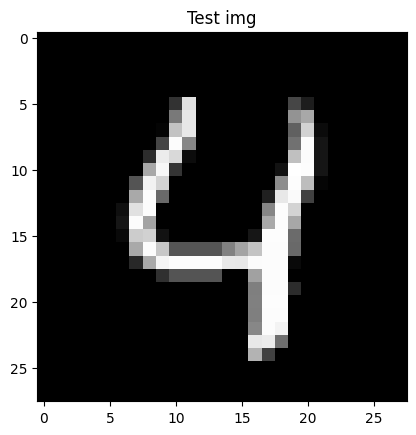

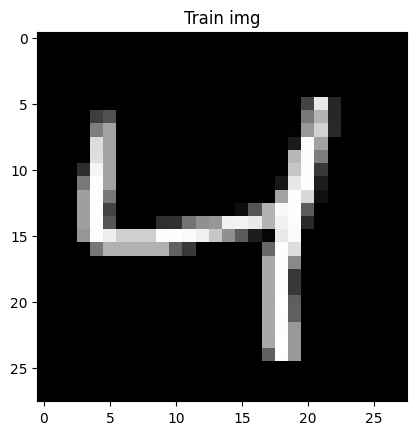

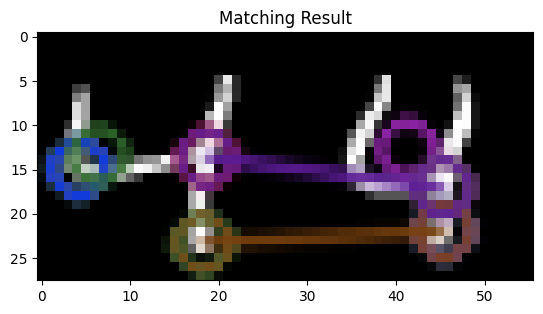

In [ ]:
import cv2
from sklearn.datasets import fetch_openml

test_img_sift = x_test[4]
plt.title('Test img')
plt.imshow(test_img_sift,cmap='gray')
plt.show()
train_img_sift = x_train[2]
plt.title('Train img')
plt.imshow(train_img_sift,cmap='gray')
plt.show()

# Load images of the chosen digit from 'train' and 'test' sets
train_image = (x_train[2] * 255).astype('uint8').reshape(28, 28)
test_image = (x_test[4] * 255).astype('uint8').reshape(28, 28)

# Initialize the SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors for both images
train_keypoints, train_descriptors = sift.detectAndCompute(train_image, None)
test_keypoints, test_descriptors = sift.detectAndCompute(test_image, None)

# Create a Brute Force Matcher
bf = cv2.BFMatcher()

# Match descriptors using KNN
matches = bf.knnMatch(train_descriptors, test_descriptors, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Display the matched keypoints (optional)
matching_result = cv2.drawMatches(train_image, train_keypoints, test_image, test_keypoints, good_matches, None)
#Plot the matched images
plt.title('Matching Result')
plt.imshow(matching_result,cmap='gray')
plt.show()



As we can see, there are 2 keypoints that the SIFT detector is able to detect clearly and they are matched as demonstrated above